<a href="https://colab.research.google.com/github/Chandradithya8/Artificial_Neural_network/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
x=df.iloc[:,3:13]
y=df['Exited']

In [3]:
a=pd.get_dummies(x[['Geography','Gender']],drop_first=True)
a.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [4]:
x=pd.concat([x,a],axis=1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [5]:
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [11]:
classifier=Sequential()

In [15]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))# inpur layer and hidden layer 1
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))# hidden layer 2
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))# output layer

In [16]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [17]:
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)
model

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.7811 - val_loss: 0.4873 - val_accuracy: 0.7899
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4543 - accuracy: 0.8052 - val_loss: 0.4630 - val_accuracy: 0.7914
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8155 - val_loss: 0.4479 - val_accuracy: 0.7952
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8222 - val_loss: 0.4375 - val_accuracy: 0.7978
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4037 - accuracy: 0.8240 - val_loss: 0.4269 - val_accuracy: 0.8058
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3927 - accuracy: 0.8311 - val_loss: 0.4215 - val_accuracy: 0.8076
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3853 - accuracy: 0.8309 - val_loss: 0.4152 - val_accuracy: 0.8129

In [25]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


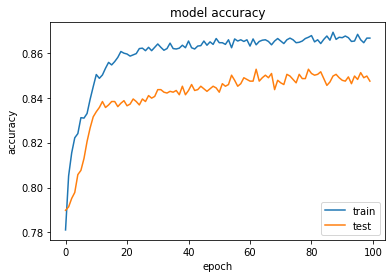

In [28]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

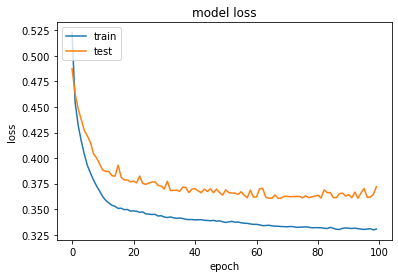

In [29]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred > 0.5)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1556   50]
 [ 221  173]]
0.8645
